In [26]:
using JSON3
using Plots
include("./src/utils.jl")

seriesjson2matrix (generic function with 1 method)

In [27]:
path = "./data/sales_2016-2021-level4.json"
str = read(path)
json = JSON3.read(str);

In [28]:
println("Número de series = ", length(json))
k=1
println("\n Ejemplo k=",k)
println("name = ",json[k].name)
println("length = ",length(json[k].points))

i=3
println("\n Ejemplo i=",i)
println(json[k].points[i])

Número de series = 631

 Ejemplo k=1
name = 03010201
length = 274

 Ejemplo i=3
{
      "x": 2394,
      "y": 7404,
   "date": "2016-01-18"
}


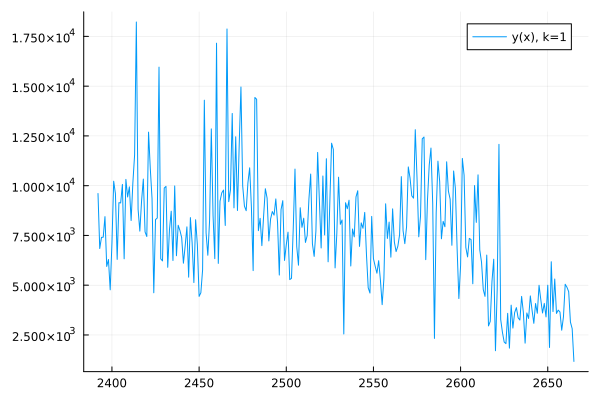

In [29]:
k=1
x, y = jsonpoints2arrays(json[k].points)

fig = plot()
plot!(x, y, label="y(x), k=$k")

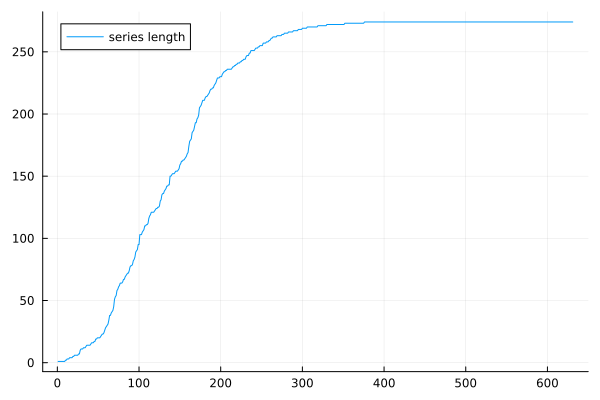

In [30]:
L = [length(json[k].points) for k =1:length(json)]
plot(sort(L), label = "series length")

In [31]:
# OBS: the series have gaps in x and no instance of y=0 

for k = 1:4
    x, y = jsonpoints2arrays(json[k].points)
    max_gap = maximum(x[2:end]-x[1:end-1])
    min_y = minimum(y)
    if length(x) > 1
        println("k = $k, max{x_gap} = $max_gap, min{y} = $min_y")
    else
        println("k = $k")
    end
end

k = 1, max{x_gap} = 1, min{y} = 1170
k = 2, max{x_gap} = 2, min{y} = 2
k = 3, max{x_gap} = 3, min{y} = 4
k = 4, max{x_gap} = 3, min{y} = 1


In [32]:
Y, min_x = seriesjson2matrix(json)
m , n = size(Y)

min_x = 2392
max_x = 2665


(273, 631)

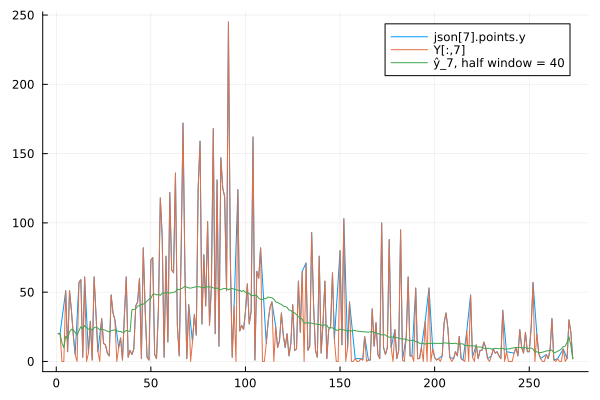

In [33]:
k = 7

x, y = jsonpoints2arrays(json[k].points)
plot(x.-(min_x-1), y, label="json[$k].points.y")

plot!(Y[:,k], label = "Y[:,$k]")

using Statistics: mean
moving_average(y, hw) = [i < hw ? mean(@view y[1:i]) : (i>length(y)-hw ? mean(@view y[i:end]) : mean(@view y[i-hw+1:i+hw])) for i in 1:length(y)]

hw = 40
ŷ = moving_average(Y[:,k], hw)
plot!(ŷ, label = "ŷ_$k, half window = $hw")